In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [37]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [9]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\uspopulation.csv', index_col='DATE', parse_dates=True)

In [13]:
df.index.freq='MS'

In [15]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

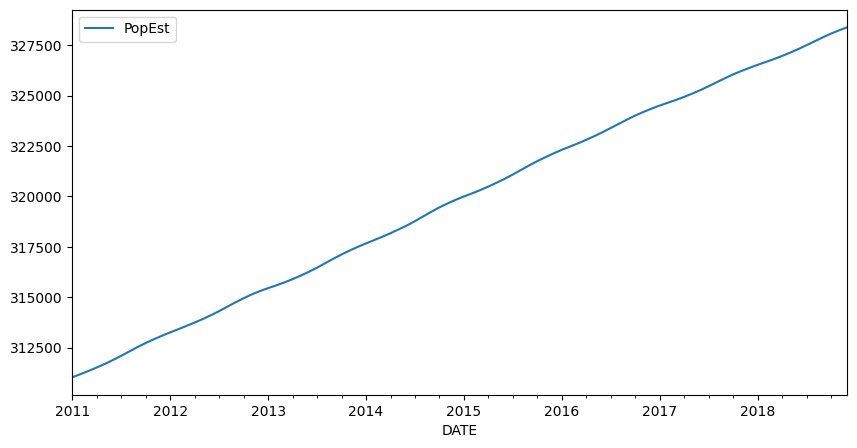

In [17]:
df.plot(figsize=(10,5))

In [19]:
len(df)

96

In [21]:
96-12

84

In [23]:
train = df.iloc[:84]
test = df.iloc[84:]

In [25]:
import warnings
warnings.filterwarnings('ignore')

## Model 1

In [39]:
model = AutoReg(train['PopEst'], lags=1)

In [43]:
AR1fit = model.fit()

In [49]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [55]:
start = len(train)
end = len(train) + len(test) - 1

In [57]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [59]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [62]:
predictions1 = AR1fit.predict(start=start, end=end).rename('AR(1) Predictions')

<Axes: xlabel='DATE'>

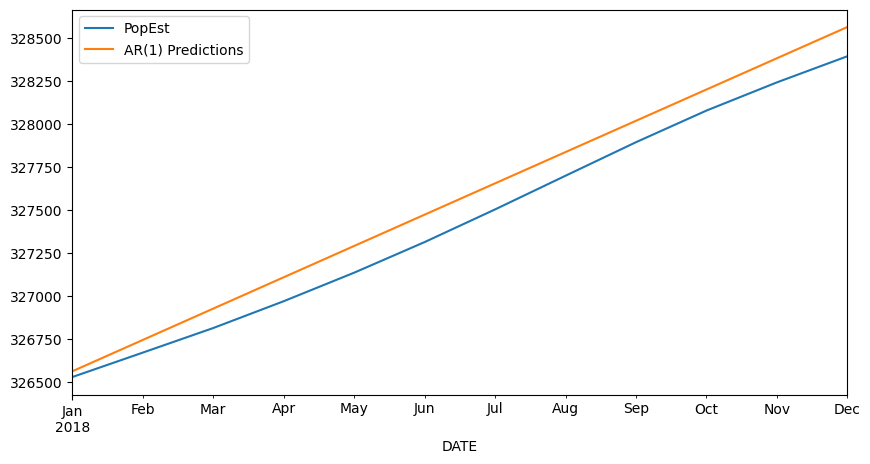

In [66]:
test.plot(figsize=(10,5), legend=True)
predictions1.plot(legend=True)

# Model 2

In [70]:
model2 = AutoReg(train['PopEst'], lags=2)

In [72]:
AR2fit = model2.fit()

In [74]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [76]:
predictions2 = AR2fit.predict(start=start, end=end).rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

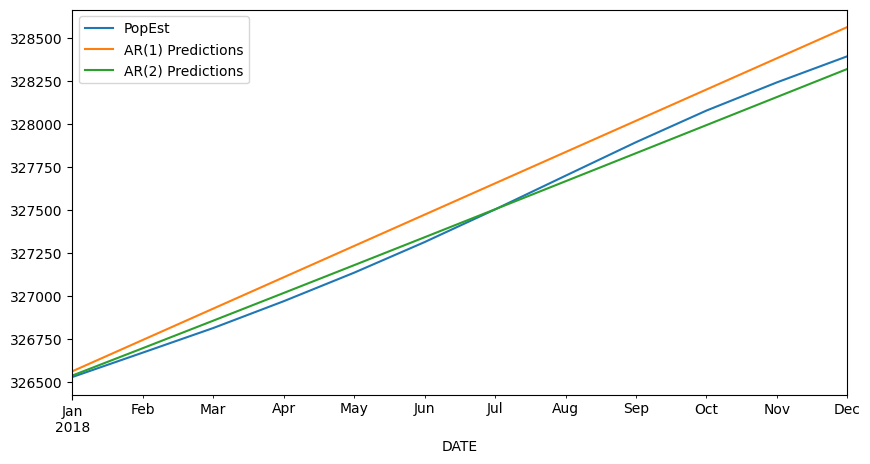

In [80]:
test.plot(figsize=(10,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

## Model 3

In [137]:
model3 = AutoReg(train['PopEst'], lags=8)

In [139]:
AR3fit = model3.fit()
print("=== Coefficients pour AR(8) ===")
print(AR3fit.params)

=== Coefficients pour AR(8) ===
const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64


In [147]:
predictions8 = AR3fit.predict(start=start, end=end).rename('AR(8) Predictions')

In [149]:
from sklearn.metrics import mean_squared_error

In [151]:
labels = ['AR1', 'AR2', 'AR8']

In [153]:
preds = [predictions1, predictions2, predictions8]

In [161]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :17449.714236936914
AR2 MSE was :2713.258528140898
AR8 MSE was :186.9728643203747


<Axes: xlabel='DATE'>

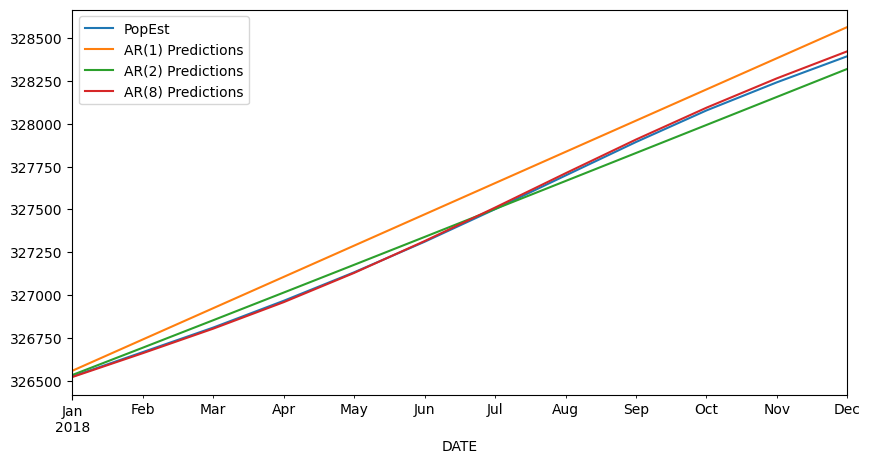

In [163]:
test.plot(figsize=(10,5), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

### The model AR with lag = 8 is more accurate, almost like the orginal

## Forecasting

In [176]:
model = AutoReg(df['PopEst'], lags=8)
ARfit = model.fit()
forcasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

<Axes: xlabel='DATE'>

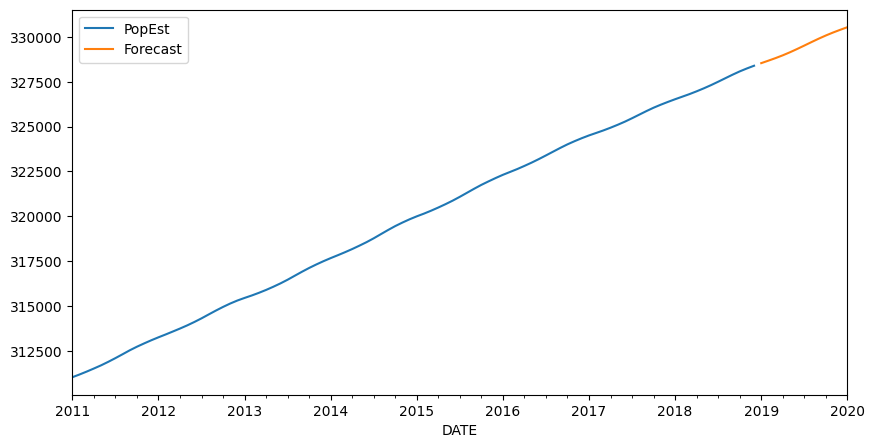

In [178]:
df['PopEst'].plot(figsize=(10,5), legend=True)
forcasted_values.plot(legend=True)